# Fuel Delivery optimization ATS problem

## 1. Problem Breakdown

## 2. Data understanding & analysis

#### Setup the data

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
stations = pd.read_excel(
    io="../data_ready/stations.xlsx", sheet_name="stations", index_col=0
)
small_trucks = pd.read_excel(
    io="../data_ready/small_trucks.xlsx", sheet_name="info", index_col=0
)
large_trucks = pd.read_excel(
    io="../data_ready/large_trucks.xlsx", sheet_name="info", index_col=0
)

In [3]:
display(stations.head(3))
display(small_trucks)
display(large_trucks)

,Longitude,Latitude,Authorized Truck Type
ID_POI,,,
0,3.097812,36.745812,large/small (kharouba depot)
1,3.181400,36.725544,large
2,3.051157,36.788258,small


,Quantity,Capacity (Litres),Consumption (L/100km)
ID_Truck,,,
1,7,15000,34
2,3,12000,34


,Quantity,Capacity (Litres),Consumption (L/100km)
ID_Truck,,,
1,10,27000,38
2,14,27000,40


In [4]:
# constants
TANK_CAPACITY = 4000  # litres
TRUCK_SPEED = 80  # km/h

In [5]:
# input: constraints (as given above)
# output: path for each truck


# the main algorithm should be as follows
def slove(**kwargs):
    raise NotImplementedError

### optimization problem

#### objectives:
1. Minimize the total distance traveled by all trucks combined.
2. Minimize the total amount of fuel consumed by all trucks.
3. Minimize the total driving Time (related to 1)
4. Minimize the time taken by the algorithm (optional -at least for me!-)

#### constraints:
1. Max tank capacity for each station is 8000 litres.
2. Trucks will pass only by the stations that authorised it.
3. 

In [6]:
print(
    "small trucks total capacity",
    np.sum(small_trucks["Quantity"] * small_trucks["Capacity (Litres)"]),
)
print(
    "small trucks stations total capacity",
    stations[stations["Authorized Truck Type"] == "small"].shape[0] * 8000,
)

print(
    "large trucks total capacity",
    np.sum(large_trucks["Quantity"] * large_trucks["Capacity (Litres)"]),
)
print(
    "large trucks stations total capacity",
    stations[stations["Authorized Truck Type"] == "large"].shape[0] * 8000,
)

small trucks total capacity 141000
small trucks stations total capacity 240000
large trucks total capacity 648000
large trucks stations total capacity 184000


In [7]:
import requests


def get_distance(lon1, lat1, lon2, lat2):
    url = (
        f"https://router.project-osrm.org/route/v1/driving/{lon1},{lat1};{lon2},{lat2}"
    )
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200:
        # Extract the distance in meters from the response
        distance = data["routes"][0]["distance"]
        return distance
    else:
        raise Exception(f"error: {response.status_code}")


def split_small_large(df):
    print("building small/large trucks stations dataframes...")
    small_trucks_stations_df = df[
        df["Authorized Truck Type"].isin(["large/small (kharouba depot)", "small"])
    ]
    large_trucks_stations_df = df[
        df["Authorized Truck Type"].isin(["large/small (kharouba depot)", "large"])
    ]

    small_trucks_stations_distances = []
    large_trucks_stations_distances = []

    # for small
    print("building small_trucks_stations_distances...")
    for idx1, row1 in small_trucks_stations_df.iterrows():
        for idx2, row2 in small_trucks_stations_df.iterrows():
            if idx1 != idx2:
                small_trucks_stations_distances.append(
                    (
                        idx1,
                        idx2,
                        get_distance(
                            row1["Longitude"],
                            row1["Latitude"],
                            row2["Longitude"],
                            row2["Latitude"],
                        ),
                    )
                )
        print(f"station {idx1}/{small_trucks_stations_df.shape[0]} done!")

    print("building large_trucks_stations_distances...")
    for idx1, row1 in large_trucks_stations_df.iterrows():
        for idx2, row2 in large_trucks_stations_df.iterrows():
            if idx1 != idx2:
                large_trucks_stations_distances.append(
                    (
                        idx1,
                        idx2,
                        get_distance(
                            row1["Longitude"],
                            row1["Latitude"],
                            row2["Longitude"],
                            row2["Latitude"],
                        ),
                    )
                )
        print(f"station {idx1}/{large_trucks_stations_df.shape[0]} done!")

    return (
        small_trucks_stations_df,
        small_trucks_stations_distances,
        large_trucks_stations_df,
        large_trucks_stations_distances,
    )

In [8]:
small_df, small_dist, large_df, large_dist = split_small_large(stations)

display(small_df)
print(small_dist)
display(large_df)
print(large_dist)

building small/large trucks stations dataframes...
building small_trucks_stations_distances...
station 0/31 done!
station 2/31 done!
station 3/31 done!
station 4/31 done!
station 5/31 done!
station 6/31 done!
station 7/31 done!
station 8/31 done!
station 10/31 done!
station 16/31 done!
station 17/31 done!
station 18/31 done!
station 19/31 done!
station 20/31 done!
station 21/31 done!
station 22/31 done!
station 23/31 done!
station 24/31 done!
station 25/31 done!
station 26/31 done!
station 27/31 done!
station 28/31 done!
station 29/31 done!
station 30/31 done!
station 31/31 done!
station 44/31 done!
station 45/31 done!
station 46/31 done!
station 51/31 done!
station 52/31 done!
station 53/31 done!
building large_trucks_stations_distances...
station 0/24 done!
station 1/24 done!
station 9/24 done!
station 11/24 done!
station 12/24 done!
station 13/24 done!
station 14/24 done!
station 15/24 done!
station 32/24 done!
station 33/24 done!
station 34/24 done!
station 35/24 done!
station 36/2

,Longitude,Latitude,Authorized Truck Type
ID_POI,,,
0,3.097812,36.745812,large/small (kharouba depot)
2,3.051157,36.788258,small
3,3.051171,36.796158,small
4,3.089298,36.728985,small
5,3.093087,36.720287,small
6,3.088958,36.729706,small
7,3.079513,36.729176,small
8,3.088046,36.731655,small
10,3.084284,36.740982,small


[(0, 2, 13801.8), (0, 3, 14175.1), (0, 4, 6964.3), (0, 5, 6358.2), (0, 6, 7241.5), (0, 7, 8313.6), (0, 8, 7542.3), (0, 10, 7404), (0, 16, 5719.1), (0, 17, 5485.4), (0, 18, 5682.6), (0, 19, 4190.8), (0, 20, 14043.8), (0, 21, 13957), (0, 22, 14325.9), (0, 23, 13100.2), (0, 24, 14548.2), (0, 25, 13512), (0, 26, 14650.9), (0, 27, 13599.1), (0, 28, 8605.7), (0, 29, 9099.8), (0, 30, 9681.7), (0, 31, 10581.4), (0, 44, 12369.2), (0, 45, 9979.3), (0, 46, 9052.5), (0, 51, 6838), (0, 52, 6992.6), (0, 53, 6215), (2, 0, 8574.5), (2, 3, 2377.5), (2, 4, 10482.7), (2, 5, 11585.6), (2, 6, 10536.7), (2, 7, 10863), (2, 8, 10153.6), (2, 10, 8367.1), (2, 16, 9205.3), (2, 17, 9802.3), (2, 18, 9578.6), (2, 19, 11563.9), (2, 20, 3775.7), (2, 21, 5867.9), (2, 22, 4855.9), (2, 23, 4126.9), (2, 24, 5078.2), (2, 25, 4056.9), (2, 26, 5180.8), (2, 27, 4144), (2, 28, 6463.1), (2, 29, 6918), (2, 30, 4842.8), (2, 31, 3453.8), (2, 44, 4844.8), (2, 45, 7447.2), (2, 46, 9314.2), (2, 51, 14864.6), (2, 52, 15019.2), (2, 53

,Longitude,Latitude,Authorized Truck Type
ID_POI,,,
0,3.097812,36.745812,large/small (kharouba depot)
1,3.181400,36.725544,large
9,3.081807,36.716774,large
11,3.127552,36.738258,large
12,3.124940,36.739410,large
13,3.096369,36.745308,large
14,3.095773,36.746250,large
15,3.103223,36.740936,large
32,3.047838,36.714031,large


[(0, 1, 8011.3), (0, 9, 7974.5), (0, 11, 2949), (0, 12, 5535.3), (0, 13, 4962.4), (0, 14, 7110.6), (0, 15, 4773), (0, 32, 11910.7), (0, 33, 11899.9), (0, 34, 11861.4), (0, 35, 11737.7), (0, 36, 12004.1), (0, 37, 8181.7), (0, 38, 10813.1), (0, 39, 8181.7), (0, 40, 10838.3), (0, 41, 9927.4), (0, 42, 9681.7), (0, 43, 9521.9), (0, 47, 9222.3), (0, 48, 44822.5), (0, 49, 42347), (0, 50, 41580.7), (1, 0, 11656.6), (1, 9, 10641.2), (1, 11, 7172.1), (1, 12, 6537), (1, 13, 9015.7), (1, 14, 11468.4), (1, 15, 8863.9), (1, 32, 16256.4), (1, 33, 15656.7), (1, 34, 15359.4), (1, 35, 15086.7), (1, 36, 15502.1), (1, 37, 12147.5), (1, 38, 14090.1), (1, 39, 12147.5), (1, 40, 14115.3), (1, 41, 14850.2), (1, 42, 14604.4), (1, 43, 14444.7), (1, 47, 12772.1), (1, 48, 41206.6), (1, 49, 38731.1), (1, 50, 37964.7), (9, 0, 6653), (9, 1, 12175.3), (9, 11, 9588.7), (9, 12, 7665), (9, 13, 6773.5), (9, 14, 6699.6), (9, 15, 5091.9), (9, 32, 4484.9), (9, 33, 4474), (9, 34, 4435.6), (9, 35, 4548.8), (9, 36, 4578.3), (9,

showing the map...


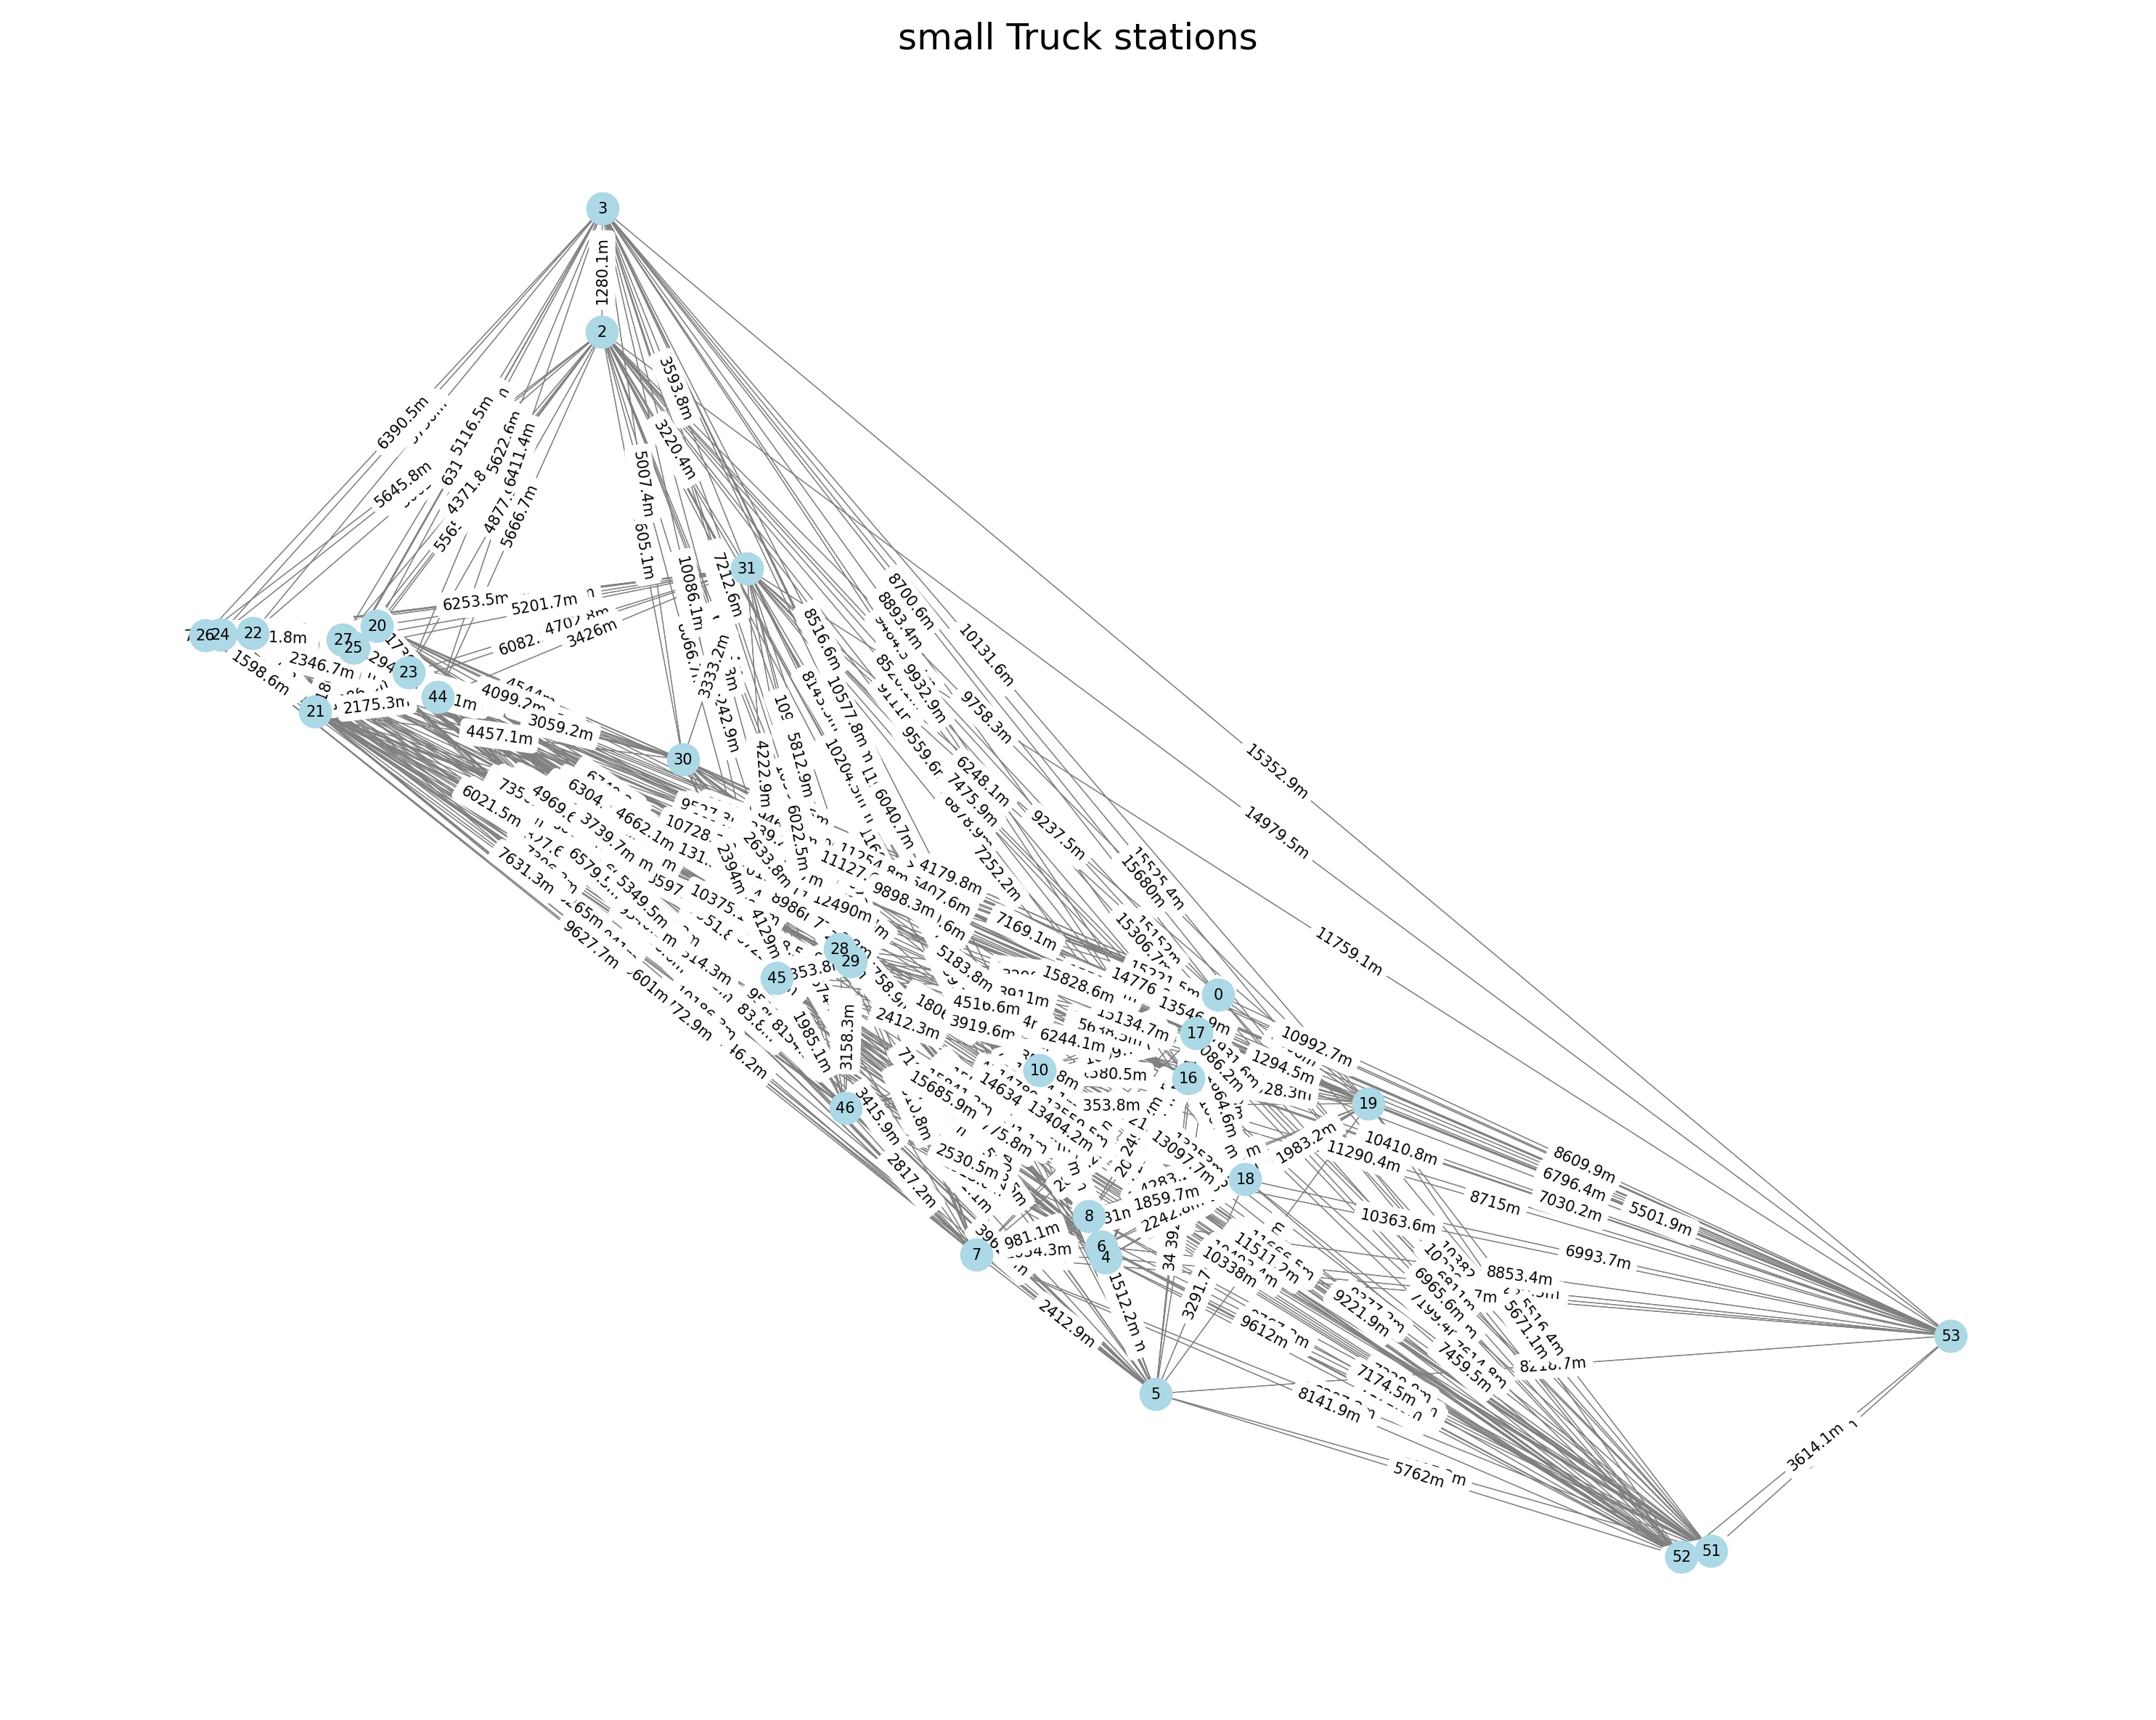

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os


def draw_map(locations_df, routes, ttype):
    # Create an undirected graph
    G = nx.Graph()

    # Add nodes with attributes
    for index, row in locations_df.iterrows():
        G.add_node(index, pos=(row["Longitude"], row["Latitude"]))

    # Add edges with distances
    for route in routes:
        G.add_edge(route[0], route[1], distance=route[2])

    # Get positions and labels for drawing
    pos = nx.get_node_attributes(G, "pos")
    labels = {node: str(node) for node in G.nodes()}

    # Increase figure size
    plt.figure(figsize=(10, 8), dpi=300)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=100, node_color="lightblue")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=routes, edge_color="gray", width=0.3)

    # Draw the labels with smaller font and avoid overlap
    nx.draw_networkx_labels(
        G, pos, labels, font_size=5, font_color="black", font_family="sans-serif"
    )

    # Draw the edge labels (distances)
    edge_labels = {(u, v): f"{str(d['distance'])}m" for u, v, d in G.edges(data=True)}
    try:
        nx.draw_networkx_edge_labels(G=G, pos=pos, edge_labels=edge_labels, font_size=5)
    except Exception:
        pass

    print("showing the map...")
    # Adjust plot parameters
    plt.title(f"{ttype} Truck stations")
    plt.axis("off")  # Turn off axis
    plt.tight_layout()  # Adjust layout for better fit

    folder_path = "../utils/maps/"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    filename = f"{ttype}_trucks_map.png"
    filepath = os.path.join(folder_path, filename)
    plt.savefig(filepath)

    plt.show()


# Example usage:
draw_map(small_df, small_dist, "small")

showing the map...


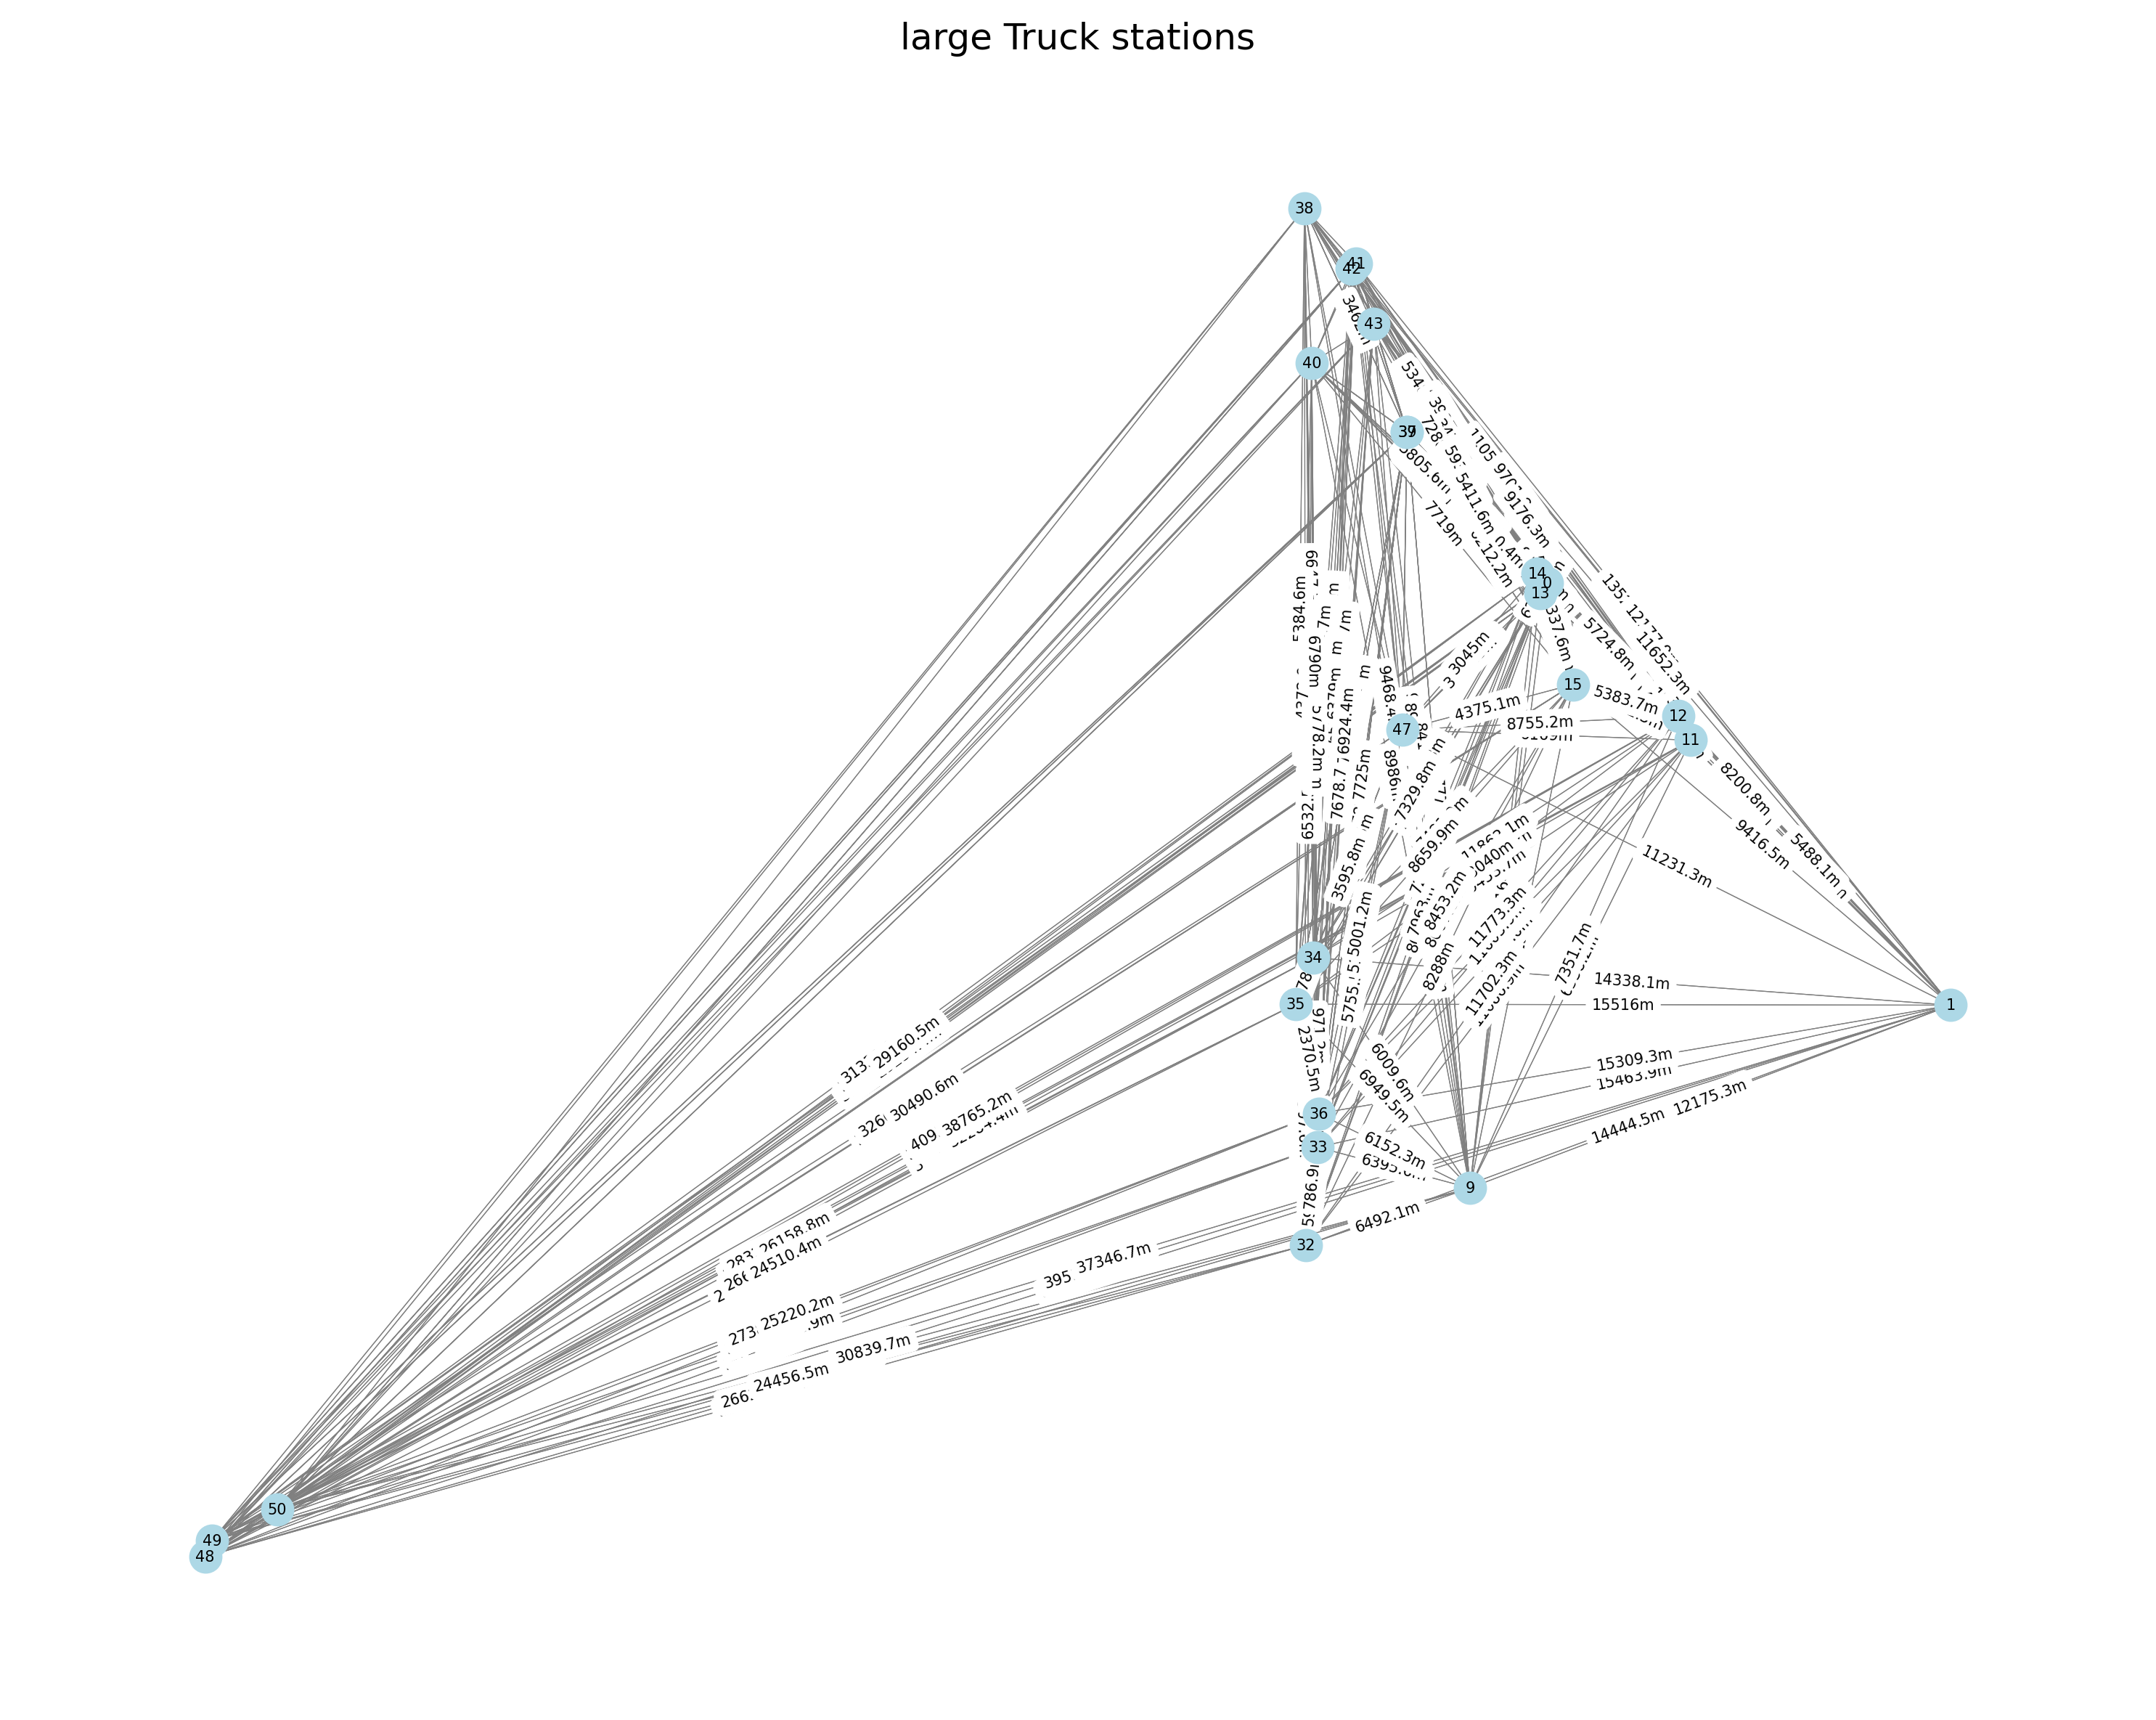

In [10]:
draw_map(large_df, large_dist, "large")

In [11]:
# example

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = [
        [0, 2, 9, 10, 3, 5, 8, 7, 4, 6],  # Location 0
        [2, 0, 7, 8, 10, 10, 3, 2, 5, 8],  # Location 1
        [9, 7, 0, 4, 8, 6, 7, 5, 6, 2],  # Location 2
        [10, 8, 4, 0, 5, 8, 9, 6, 4, 3],  # Location 3
        [3, 10, 8, 5, 0, 2, 4, 8, 9, 7],  # Location 4
        [5, 10, 6, 8, 2, 0, 6, 7, 8, 3],  # Location 5
        [8, 3, 7, 9, 4, 6, 0, 5, 7, 8],  # Location 6
        [7, 2, 5, 6, 8, 7, 5, 0, 2, 4],  # Location 7
        [4, 5, 6, 4, 9, 8, 7, 2, 0, 5],  # Location 8
        [6, 8, 2, 3, 7, 3, 8, 4, 5, 0],  # Location 9
    ]
    data["demands"] = [
        0,
        1,
        1,
        2,
        4,
        2,
        1,
        4,
        3,
        2,
    ]  # Demand at each location (0 for depot)
    data["vehicle_capacities"] = [5, 5, 10, 10]  # Vehicle capacities
    data["num_vehicles"] = 4
    data["depot"] = 0  # Depot location
    return data


def main():
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        # Returns the distance between the two nodes.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Capacity constraint.
    def demand_callback(from_index):
        # Returns the demand of the node.
        from_node = manager.IndexToNode(from_index)
        return data["demands"][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data["vehicle_capacities"],  # vehicle maximum capacities
        True,  # start cumul to zero
        "Capacity",
    )

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f"Total distance of all routes: {solution.ObjectiveValue()}m")
    total_load = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data["demands"][node_index]
            plan_output += f" {node_index} Load({route_load}) ->"
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f" {manager.IndexToNode(index)}\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        plan_output += f"Load of the route: {route_load}\n"
        print(plan_output)
        total_load += route_load
    print(f"Total load of all routes: {total_load}")


if __name__ == "__main__":
    main()

Total distance of all routes: 38m
Route for vehicle 0:
 0 Load(0) -> 0
Distance of the route: 0m
Load of the route: 0

Route for vehicle 1:
 0 Load(0) -> 0
Distance of the route: 0m
Load of the route: 0

Route for vehicle 2:
 0 Load(0) -> 1 Load(1) -> 7 Load(5) -> 6 Load(6) -> 4 Load(10) -> 0
Distance of the route: 16m
Load of the route: 10

Route for vehicle 3:
 0 Load(0) -> 5 Load(2) -> 9 Load(4) -> 2 Load(5) -> 3 Load(7) -> 8 Load(10) -> 0
Distance of the route: 22m
Load of the route: 10

Total load of all routes: 20


In [50]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_cvrp_model(distance_matrix, demands, vehicle_capacities):
    manager = pywrapcp.RoutingIndexManager(
        len(distance_matrix), len(vehicle_capacities), 0
    )
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return distance_matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    vehicle_capacities = [int(cap) for cap in vehicle_capacities]
    for i in range(len(vehicle_capacities)):
        routing.AddDimension(
            transit_callback_index, 0, vehicle_capacities[i], True, f"Capacity_{i}"
        )

    for i, demand in enumerate(demands):
        routing.AddDisjunction([manager.NodeToIndex(i)], demand)

    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    return routing, manager, search_parameters

In [51]:
def solve_cvrp(routing, manager, search_parameters):
    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        routes = []
        for vehicle_id in range(routing.vehicles()):
            index = routing.Start(vehicle_id)
            route = []
            while not routing.IsEnd(index):
                node_index = manager.IndexToNode(index)
                route.append(node_index)
                index = solution.Value(routing.NextVar(index))
            route.append(manager.IndexToNode(index))
            routes.append(route)
        return routes
    else:
        return None

In [52]:
def evaluate_solution(routes, distance_matrix):
    total_distance = 0
    for route in routes:
        for i in range(len(route) - 1):
            total_distance += distance_matrix[route[i]][route[i + 1]]
    return total_distance

In [53]:
small_stations = list(small_df.index)
large_stations = list(large_df.index)

small_vehicles = [small_trucks.iloc[0]["Capacity (Litres)"]] * small_trucks.iloc[0][
    "Quantity"
] + [small_trucks.iloc[1]["Capacity (Litres)"]] * small_trucks.iloc[1]["Quantity"]
large_vehicles = [large_trucks.iloc[0]["Capacity (Litres)"]] * large_trucks.iloc[0][
    "Quantity"
] + [large_trucks.iloc[1]["Capacity (Litres)"]] * large_trucks.iloc[1]["Quantity"]


def get_params(distances, stations, vehicles):
    distances_matrix = np.zeros((len(stations), len(stations)))
    for dis in distances:
        distances_matrix[stations.index(dis[0]), stations.index(dis[1])] = dis[2]
        demand = [0] + [4000] * (len(stations) - 1)
    return distances_matrix, demand, vehicles

In [54]:
dist_mat, demand, vehicles = get_params(small_dist, small_stations, small_vehicles)

In [55]:
routing, manager, search_parameters = create_cvrp_model(dist_mat, demand, vehicles)

In [56]:
solve_cvrp(routing, manager, search_parameters)

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0,
  30,
  29,
  28,
  27,
  26,
  25,
  24,
  23,
  22,
  21,
  20,
  19,
  18,
  17,
  16,
  15,
  14,
  13,
  12,
  11,
  10,
  9,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  1,
  0]]